In [81]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt


In [82]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [83]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [84]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape
# tall skinny matrices with the files from the categories we chose 

((2034,), (2034,))

In [85]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [86]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:4]]# this just gives back the name of the category
#based on the index( the .target)
#print(newsgroups_train.target)
#print(np.array(newsgroups_train.target_names))

array(['comp.graphics', 'talk.religion.misc', 'sci.space', 'alt.atheism'],
      dtype='<U18')

In [87]:
newsgroups_train.target[:10] # .target gives us the indeces 

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [88]:
num_topics, num_top_words = 6, 8

In [89]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [90]:
vectorizer = CountVectorizer(stop_words='english') #vectorizer set up
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # Returns a term document matrix
vectors.shape, 


((2034, 26576),)

In [91]:
print(len(newsgroups_train.data), vectors.shape)# size makes sense 

2034 (2034, 26576)


In [92]:
vocab = np.array(vectorizer.get_feature_names()) # array of the words in documents
# .get_feature_names maps from indices (interger) to associated names

In [93]:
vocab.shape

(26576,)

In [94]:
vocab[7000:7020]#alphabetical

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

In [95]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 46.9 s, sys: 2.32 s, total: 49.3 s
Wall time: 18.4 s


In [96]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [97]:
#Checking that U S and Vh are indeed the correct decomposition

sr = np.linalg.matrix_rank(U)
S = np.zeros((sr,sr))
#could instead use np.diag(s): takes in vector and makes square matrix 
#with vector values on diagonals. Matrix input return vector of diagonal
for i in range(sr):
    S[i][i] = s[i]
R = U @ S @ Vh
np.allclose(R, vectors) # allclose bc floating point errors

True

In [98]:
# check U is orthonornmal, U is square so U = U^T
np.allclose(linalg.inv(U), U.transpose())


True

In [99]:
#Checking Vh is also orthonormal, non-square w/ c > r so Vh Vh^T = I 
N = Vh @ Vh.transpose() 
I = np.zeros((sr,sr))
for i in range(sr):
    I[i][i] = 1
np.allclose(I, N)

True

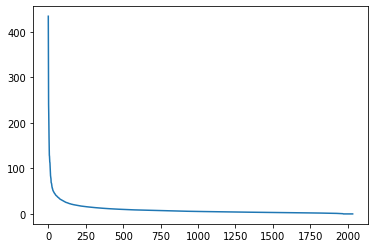

In [100]:
plt.plot(s); #Singular values weight drop of quite quickly

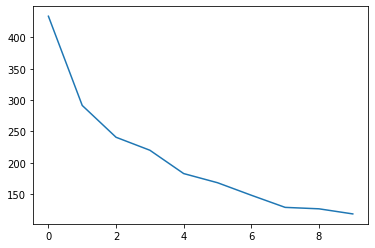

In [101]:
plt.plot(s[:10])

In [102]:
num_top_words = 8
# np.argsort returns matrix of sorted vocab indexed by placement in alphabetical list
def show_topics(a):# input matrix Vh
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words - 1 : -1]]# t is going to be a 1d array adds from 8 to 1th
    topic_words = ([top_words(t) for t in a]) # add vocab for each array
    return [' '.join(t) for t in topic_words]


In [51]:
show_topics(Vh[:10])
# It seems like we are able to get the relevant information, topics, based on one of the factorized components 
#From terms document matrix we are able to extract topics, pretty cool 

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [52]:
m, n = vectors.shape
d = 5


In [117]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_




6.507581555010292


AttributeError: 'numpy.ndarray' object has no attribute 'where'

In [54]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [123]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)#normalizes term - doc matrix into topic frequency
#inverse document frequency matrix 

In [125]:
#NMF from scratch using Stochastic Gradient Decent 

lam = 1e3
lr = 1e-2
m, n = vectors_tfidf.shape
print(m, n)

2034 26576


In [126]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_



In [127]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [128]:
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W,mu)*lam, W.T@R + penalty(H,mu)*lam #dw, dH looked it up, penalizes neg matrixes 

In [129]:
def penalty(M, mu):
    return np.where(M>= mu, 0, np.min(M-mu, 0))

In [130]:
def upd(M, W, H, lr): 
    dW, dH = grads(M, W, H)
    W -= lr*dW; H-=lr*dH
    

In [131]:
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [138]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [139]:
report(vectors_tfidf, W, H)

44.423538641802445 9.875692456051532e-07 1.1679101700494779e-08 0 0


In [140]:
upd(vectors_tfidf, W, H, lr)

In [141]:
report(vectors_tfidf, W, H)

44.41616902139916 -0.0009964330510316627 -7.455498728866357e-05 147 261


In [142]:
for i in range(50): #minimizing distance between guessed matrix decomposition product and data
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H) 

44.41103687875441 -0.0006455895656342047 -6.867800532625221e-05 110 280
44.3740176451461 -0.0003089509448072023 -5.505077755312275e-05 43 516
44.34560440972866 -0.00021762017353456592 -7.304048774537956e-05 31 939
44.313798945883065 -0.0001417842962625784 -8.068781062030715e-05 24 1450
44.27880679845299 -9.395886954492009e-05 -0.00010865598338729348 23 2131


In [143]:
show_topics(H)

['space does god don people just know think',
 'god space like people don just think know',
 'space think god don people like just know',
 'god people don space like just think does',
 'space people just don god like know think']

In [145]:
import torch
import torch.cuda as tc
from torch.autograd import variable

In [146]:
def V(M): return Variable(M, requires_grad=True)


In [158]:
v = vectors_tfidf.todense()

In [159]:
t_vectors = torch.Tensor(v.astype(np.float32)).cuda()

In [160]:
mu = 1e-5

In [161]:
def grads_t(M, W, H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W, mu)*lam, 
        W.t().mm(R) + penalty_t(H, mu)*lam) # dW, dH

def penalty_t(M, mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M - mu, max=0.)

def upd_t(M, W, H, lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H): 
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())



In [162]:
t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_(); 
t_H.normal_(std=0.01).abs_();



In [163]:
d= 6; lam = 100; lr = 0.05

In [164]:
for i in range(10000): 
    upd_t(t_vectors,t_W,t_H,lr)
    if i % 100 == 0: 
        report_t(t_vectors,t_W,t_H)
        lr *= 0.9

tensor(44.3933, device='cuda:0') tensor(-0.0059, device='cuda:0') tensor(-0.0005, device='cuda:0') tensor(1543, device='cuda:0') tensor(2270, device='cuda:0')
tensor(43.7291, device='cuda:0') tensor(-0.0166, device='cuda:0') tensor(-0.0156, device='cuda:0') tensor(2076, device='cuda:0') tensor(24037, device='cuda:0')
tensor(43.6790, device='cuda:0') tensor(-0.0059, device='cuda:0') tensor(-0.0044, device='cuda:0') tensor(2226, device='cuda:0') tensor(23930, device='cuda:0')
tensor(43.6657, device='cuda:0') tensor(-0.0068, device='cuda:0') tensor(-0.0169, device='cuda:0') tensor(2434, device='cuda:0') tensor(23447, device='cuda:0')
tensor(43.6606, device='cuda:0') tensor(-0.0042, device='cuda:0') tensor(-0.0054, device='cuda:0') tensor(2577, device='cuda:0') tensor(23883, device='cuda:0')
tensor(43.6591, device='cuda:0') tensor(-0.0061, device='cuda:0') tensor(-0.0043, device='cuda:0') tensor(3046, device='cuda:0') tensor(25601, device='cuda:0')
tensor(43.6588, device='cuda:0') tensor(-

KeyboardInterrupt: 

In [165]:


show_topics(t_H.cpu().numpy())



['graphics image file files format software use color',
 'god jesus bible believe christian atheism belief does',
 'ico bobbe tek bronx beauchaine manhattan sank queens',
 'space nasa launch shuttle orbit moon lunar earth',
 'thanks know advance looking does mail help anybody',
 'people don think just like objective say morality']

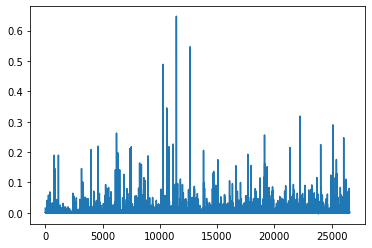

In [166]:
plt.plot(t_H.cpu().numpy()[0])